In [3]:
import numpy as np

from analyzeSwarmSensitivity_Functions import solve_with_jittered_swarm,make_misalignment_params,get_results_misaligned_dim,plot_trajectories_with_jittered_swarm,JitteredSwarmModel

import matplotlib.pyplot as plt

from helper_tools import *

from storageRingModeler import StorageRingModel,make_optimal_solution_model
from phaseSpaceAnalyzer import SwarmSnapShot
from particle import Swarm

model=make_optimal_solution_model()

In [7]:
def solve(ds):
    with JitteredSwarmModel(model, 0.0,0.0,0.0, ds,0.0,0.0) as jitteredModel:
        _results=jitteredModel.mode_match()
    return _results
vals=np.linspace(-5,5,15)
results=parallel_evaluate(solve,vals)

ValueError: x and y must have same first dimension, but have shapes (15,) and (30,)

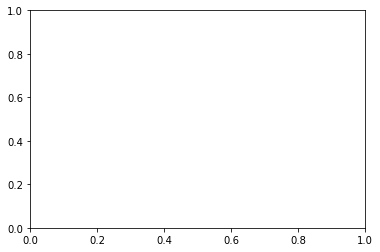

In [42]:
flux=[row[1] for row in results]
plt.plot(vals,flux )
plt.show()

In [ ]:
#jittered results over the space of possible jittering
angle_max=np.pi*1/180
rMax=2e-3
x_max=3e-3
delta_speed=2.0
params=make_misalignment_params(x_max,rMax,delta_speed,angle_max,200)
wrap = lambda param: solve_with_jittered_swarm(model,*param)
results_new=parallel_evaluate(wrap,params)
results=[*results,*results_new]

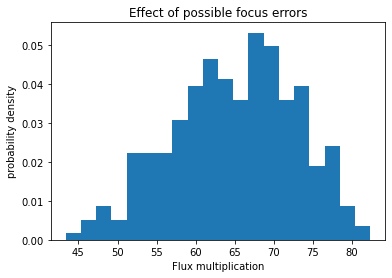

In [56]:
fluxes=[row[1] for row in results]
plt.hist(fluxes,bins=20,density=True)
plt.title("Effect of possible focus errors")
plt.ylabel('probability density')
plt.xlabel("Flux multiplication")
plt.show()

In [11]:
#jittering along each axis of the space independently
delta_speed_max=5.0
angle_max=np.pi*2/180
rMax=5e-3
x_max=3e-2


numPointsDim=10
x_arr=np.linspace(-x_max,x_max,numPointsDim)
y_arr=np.linspace(-rMax,rMax,numPointsDim)
z_arr=y_arr.copy()
speed_arr=np.linspace(-delta_speed_max,delta_speed_max,numPointsDim)
rot_angle_yArr=np.linspace(-angle_max,angle_max,numPointsDim)
rot_angle_z_arr=rot_angle_yArr.copy()
arrs=(x_arr,y_arr,z_arr,speed_arr,rot_angle_yArr,rot_angle_z_arr)
singleAxisResults=[]
for i,arr in enumerate(arrs):
    def solve(x):
        params=[0]*len(arrs)
        params[i]=x
        return solve_with_jittered_swarm(model,*params)
    singleAxisResults.append(parallel_evaluate(solve,arr))




[(0.7487163117125999, 62.51043502703296),
 (0.735306734785326, 65.84626033652795),
 (0.7161882021718532, 70.60227056103496),
 (0.7082126960393663, 72.58629252959312),
 (0.6971304781699711, 75.34315376798729),
 (0.6843920156840436, 78.51202969860533),
 (0.6635104694558036, 83.70661494072998),
 (0.658962685431828, 84.8379416881413),
 (0.6512925189553372, 86.74600602149678),
 (0.6471812740415089, 87.7687373806933)]

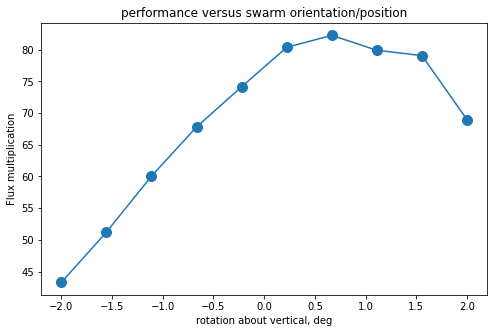

In [41]:
%matplotlib inline
axis=5
xlabels=['longitudinal shift, mm','horizontal shift, mm','vertical shift, mm','speed change, m/s','rotation about horizontal, deg','rotation about vertical, deg']
title='performance versus swarm orientation/position'
factors=[1e3,1e3,1e3,1.0,180/np.pi,180/np.pi]
y=np.array(singleAxisResults[axis])[:,1]
x=arrs[axis]

plt.figure(figsize=(8,5))
plt.title(title)
plt.plot(x*factors[axis],y,marker='o',markersize=10)
plt.ylabel("Flux multiplication")
plt.xlabel(xlabels[axis])
plt.show()

In [9]:
from analyzeSwarmSensitivity_Functions import JitteredSwarmModel
%matplotlib tk
with JitteredSwarmModel(model,0,0,0,0,0,-.1) as model_temp:
    model_temp.show_floor_plan_with_trajectories()